In [1]:
import os

In [2]:
os.getcwd()

'/home/projects/sentiment_analysis'

### Get lengths of test and train

In [5]:
negs = os.listdir('/home/projects/sentiment_analysis/aclImdb/train/neg')
len(negs)

12500

In [6]:
poss = os.listdir('/home/projects/sentiment_analysis/aclImdb/train/pos')
len(poss)

12500

### Dataframe

In [2]:
import pandas as pd

In [19]:
reviews = {}

In [20]:
i = 0
for root, dir, files in os.walk('/home/projects/sentiment_analysis/aclImdb/train'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                sentiment = root.split('/')[-1]
                rating = file.split('_')[1].split('.')[0]
                reviews[i] = {'text': text, 'sentiment': sentiment, 'rating': rating}   
                i += 1

In [21]:
reviews[0]

{'text': 'This was the first televised episode of the Columbo series (although it was filmed after "Death Lends a Hand")and it heralded one of the most successful TV series in history.<br /><br />Jack Cassidy (who played the murderer in the series three times) enthuses smugness, arrogance and self-assuredness in equal measure here, as Ken Franklin, one half of a mystery writing team who hatches an elaborate plot to kill off his partner, Jim Ferris (played by Martin Milner) who decides to terminate their professional relationship, leaving Franklin exposed as merely a good publicist rather than a prolific writer.<br /><br />The initial murder set-up is fantastic and Cassidy\'s performance facilitates an arguable accolade that he was the best Columbo murderer in the series.<br /><br />Peter Falk is wonderfully understated in his role as Columbo and the character\'s inherent traits and oddities, which are underlined by a seeming slowness and absent-mindedness, contrast particularly well wi

In [34]:
df = pd.DataFrame.from_dict(reviews, orient='index')

In [35]:
df.head()

,text,sentiment,rating
0,This was the first televised episode of the Co...,pos,7
1,"Jim Carrey is good as usual, and even though t...",pos,10
2,"I saw ""A Page of Madness"" in a silent film cou...",pos,10
3,A very close and sharp discription of the bubb...,pos,10
4,Terry Gilliam's and David Peoples' teamed up t...,pos,10


Let's look at values

In [36]:
df['rating'].value_counts()

1     5100
10    4732
8     3009
4     2696
7     2496
3     2420
2     2284
9     2263
Name: rating, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
 2   rating     25000 non-null  object
dtypes: object(3)
memory usage: 781.2+ KB


In [38]:
df['rating'] = df['rating'].astype(int)
df['text'] = df['text'].astype(str)
df['sentiment'] = df['sentiment'].astype(str)

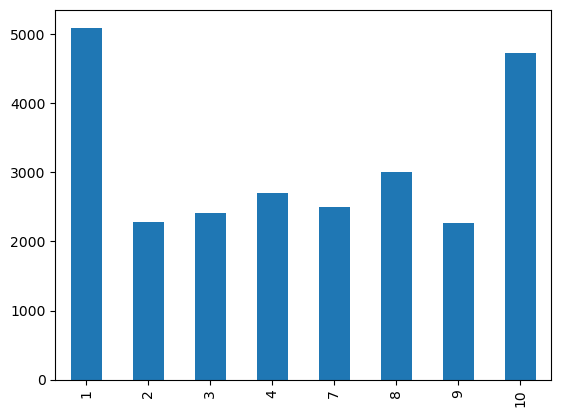

In [39]:
import matplotlib.pyplot as plt
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [40]:
df.index.name = 'id'
df.head()

,text,sentiment,rating
id,,,
0,This was the first televised episode of the Co...,pos,7
1,"Jim Carrey is good as usual, and even though t...",pos,10
2,"I saw ""A Page of Madness"" in a silent film cou...",pos,10
3,A very close and sharp discription of the bubb...,pos,10
4,Terry Gilliam's and David Peoples' teamed up t...,pos,10


In [ ]:
df.drop('sentiment', axis=1, inplace=True)

Save to csv

In [43]:
df.to_csv('/home/projects/sentiment_analysis/train.csv', index=True)

Do the same for test

In [ ]:
i = 0
for root, dir, files in os.walk('/home/projects/sentiment_analysis/aclImdb/test'):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
                sentiment = root.split('/')[-1]
                rating = file.split('_')[1].split('.')[0]
                reviews[i] = {'text': text, 'sentiment': sentiment, 'rating': rating}   
                i += 1

df = pd.DataFrame.from_dict(reviews, orient='index')

In [46]:
df.head()

,text,sentiment,rating
0,http://www.imdb.com/title/tt0406816/usercommen...,test,neg
1,http://www.imdb.com/title/tt0406816/usercommen...,test,pos
2,The final installment sees Sho Aikawa and Riki...,pos,7
3,Homicide: The Movie proved to be a good wrap-u...,pos,10
4,As a father of four in his forties I thought t...,pos,7


In [47]:
# drop first 2 rows
df.drop([0, 1], axis=0, inplace=True)
df['rating'] = df['rating'].astype(int)
df['text'] = df['text'].astype(str)
df['sentiment'] = df['sentiment'].astype(str)

df.index.name = 'id'
df.head()

df.drop('sentiment', axis=1, inplace=True)

df.to_csv('/home/projects/sentiment_analysis/test.csv', index=True)

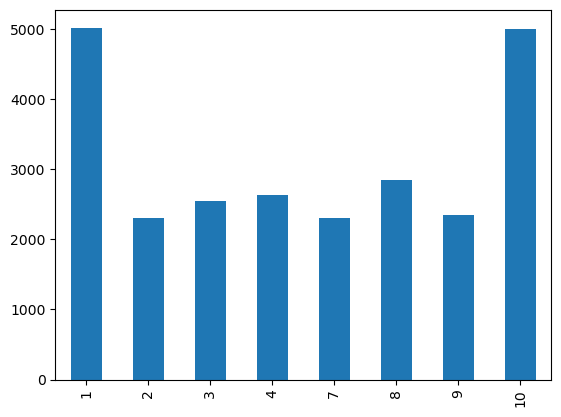

In [48]:
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.show()